<a href="https://colab.research.google.com/github/lincolngadea/colab_learning/blob/main/superv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Leitura dos arquivos de dataset
df_supervisionado = pd.read_csv('iris_superv.csv')
df_nao_supervisionado = pd.read_csv('iris_n_superv.csv')

In [4]:
# exibe dataframe
df_supervisionado.head()

,Comp. Sepalas (cm),Larg. Sepalas (cm),Comp. Petalas (cm),Larg. Petalas (cm),Classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# exibe dataframe
df_nao_supervisionado.tail()

,Comp. Sepalas (cm),Larg. Sepalas (cm),Comp. Petalas (cm),Larg. Petalas (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
# Mostra as colunas
df_nao_supervisionado.columns

Index(['Comp. Sepalas (cm)', 'Larg. Sepalas (cm)', 'Comp. Petalas (cm)',
       'Larg. Petalas (cm)'],
      dtype='object')

In [7]:
# Mostra a quantidade de linhas e colunas de um dataframe
df_supervisionado.shape

(150, 5)

In [8]:
# Obtem informações do dataframe
df_supervisionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comp. Sepalas (cm)  150 non-null    float64
 1   Larg. Sepalas (cm)  150 non-null    float64
 2   Comp. Petalas (cm)  150 non-null    float64
 3   Larg. Petalas (cm)  150 non-null    float64
 4   Classe              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


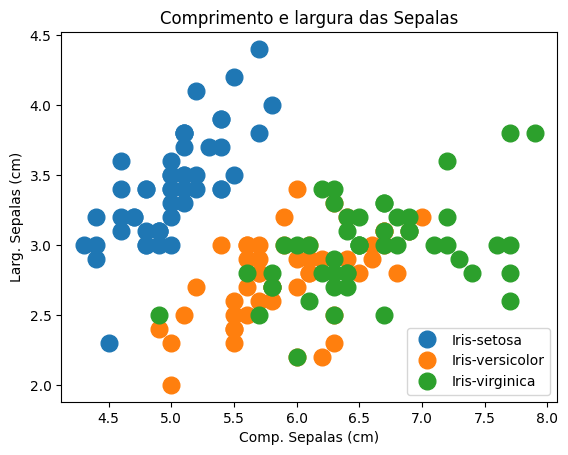

In [9]:
# Construindo gráficos
groups = df_supervisionado.groupby('Classe')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)

# Realiza a iteração sobre cada um dos grupos criados
for name, group in groups:
  ax.plot(group['Comp. Sepalas (cm)'], group['Larg. Sepalas (cm)'], marker='o', linestyle='', ms=12, label=name)

ax.legend()
plt.xlabel('Comp. Sepalas (cm)')
plt.ylabel('Larg. Sepalas (cm)')
plt.title('Comprimento e largura das Sepalas')
leg = ax.legend(loc='lower right') # Localização da legenda
plt.show()

<Axes: xlabel='Comp. Sepalas (cm)', ylabel='Larg. Sepalas (cm)'>

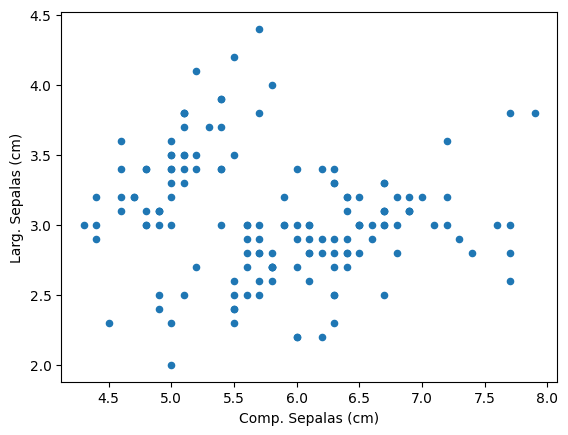

In [12]:
df_nao_supervisionado.plot.scatter(x='Comp. Sepalas (cm)', y='Larg. Sepalas (cm)', marker='o')

In [13]:
# Criando um novo dataset com base em um existente
df_supervisionado_mod = df_supervisionado.copy()

In [14]:
# Criando uma nova Coluna
df_supervisionado_mod['nova_coluna'] = df_supervisionado['Comp. Sepalas (cm)']/100

In [15]:
# Exibe o dataset modificado com a nova coluna
df_supervisionado_mod.head()

,Comp. Sepalas (cm),Larg. Sepalas (cm),Comp. Petalas (cm),Larg. Petalas (cm),Classe,nova_coluna
0,5.1,3.5,1.4,0.2,Iris-setosa,0.051
1,4.9,3.0,1.4,0.2,Iris-setosa,0.049
2,4.7,3.2,1.3,0.2,Iris-setosa,0.047
3,4.6,3.1,1.5,0.2,Iris-setosa,0.046
4,5.0,3.6,1.4,0.2,Iris-setosa,0.050


In [16]:
# Exibe o dataset supervisionado
df_supervisionado.head()

,Comp. Sepalas (cm),Larg. Sepalas (cm),Comp. Petalas (cm),Larg. Petalas (cm),Classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Modificando o nome da coluna apenas em tempo de execução
df_supervisionado_mod.rename(columns={'nova_coluna':'Comp. Sepalas (cm)'})

,Comp. Sepalas (cm),Larg. Sepalas (cm),Comp. Petalas (cm),Larg. Petalas (cm),Classe,Comp. Sepalas (cm)
0,5.1,3.5,1.4,0.2,Iris-setosa,0.051
1,4.9,3.0,1.4,0.2,Iris-setosa,0.049
2,4.7,3.2,1.3,0.2,Iris-setosa,0.047
3,4.6,3.1,1.5,0.2,Iris-setosa,0.046
4,5.0,3.6,1.4,0.2,Iris-setosa,0.050
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.067
146,6.3,2.5,5.0,1.9,Iris-virginica,0.063
147,6.5,3.0,5.2,2.0,Iris-virginica,0.065
148,6.2,3.4,5.4,2.3,Iris-virginica,0.062


In [18]:
# O Dataset mod ainda permanece com a coluna sem renomear
df_supervisionado_mod.head()

,Comp. Sepalas (cm),Larg. Sepalas (cm),Comp. Petalas (cm),Larg. Petalas (cm),Classe,nova_coluna
0,5.1,3.5,1.4,0.2,Iris-setosa,0.051
1,4.9,3.0,1.4,0.2,Iris-setosa,0.049
2,4.7,3.2,1.3,0.2,Iris-setosa,0.047
3,4.6,3.1,1.5,0.2,Iris-setosa,0.046
4,5.0,3.6,1.4,0.2,Iris-setosa,0.050


In [20]:
# Alterando o nome da coluna do dataset Mod definitivamente
df_supervisionado_mod.rename(columns={'nova_coluna':'Comp. Sepalas (cm)'}, inplace=True)
df_supervisionado_mod.head()

,Comp. Sepalas (cm),Larg. Sepalas (cm),Comp. Petalas (cm),Larg. Petalas (cm),Classe,Comp. Sepalas (cm)
0,5.1,3.5,1.4,0.2,Iris-setosa,0.051
1,4.9,3.0,1.4,0.2,Iris-setosa,0.049
2,4.7,3.2,1.3,0.2,Iris-setosa,0.047
3,4.6,3.1,1.5,0.2,Iris-setosa,0.046
4,5.0,3.6,1.4,0.2,Iris-setosa,0.050


In [21]:
# Criando um novo dataframe com base em um datase existente
df_supervisionado_mod.to_csv('df_modificado.csv', index=False)